# CA 元胞自动机
## 概述
元胞自动机是一个空间和状态都是离散的模型，可以用一个四元组表示：
$$C=(L_a,S,N,f)$$
- S表示细胞的状态，有限的、离散的状态集合；
- $L_a$表示元胞空间，a是一个正整数，表示细胞空间的维度数
- $N$表示领域内元胞的组合，$n$即邻居个数
- $f$表示状态转移规则(函数)

序号i个体在$t=1,...,n$时刻的状态
$$S_i^{t+1}=f(S_i^t,N^t)=f(S_i^t,S_1^t,S_2^t,...,S_n^t)$$

> 状态转移规则可以是确定的，也可以是随机的

In [5]:
import numpy as np
import matplotlib.pyplot as plt

## 简单示例
这里实现了一个一维CA模型，5个rows代表5个时间序列CA的变化，每一行是当前状态的一维CA数组

记住numpy.array的索引也是0开头

In [25]:
rows=10
cols=11
ca=np.zeros((rows,cols))
ca[0,5]=1
print(ca)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [26]:
def plot_ca(array):# 显示函数
    cmap=plt.get_cmap('Blues')
    plt.imshow(array,interpolation='none',cmap=cmap)

In [29]:
def step(array,i):# 状态转移函数
    rows,cols=array.shape
    for j in range(1,cols):
        array[i,j]=sum(array[i-1,j-1:j+2])%2 # 转移规则  #区间左闭右开

9个时间后会是如下图所示结果：

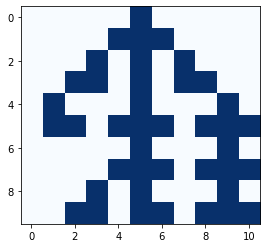

In [34]:
for i in range(1,10):
    step(ca,i)#rows:0->1
plot_ca(ca)

### 互相关运算：基于numpy的更新规则优化
如果使用`step()`中的for循环虽然简单，但是开销大，这里试图做一些修改：**用数组乘法代替切片邻域**
$$C_k=\sum_{n=0}^{N-1}a_{n+k}*W_n$$
$C_k$为互相关结果，$W_n$为window（卷积核），$a$为array，$N$为window的长度

In [36]:
def c_k(array,window,k):
    N=len(window)
    return sum(a[k:k+N]*window)# a[k]到a[k+N]

## 简单的流言模型
二维网格

In [86]:
def spread(cell,size):
    cell_new=cell.copy()# 创建一个新矩阵，不在原矩阵上进行运算
    for row in range(1,size-1):#[1,99)左开右闭
        for col in range(1,size-1):
            rumor_number=sum(cell[row-1,col-1:col+2])+sum(cell[row,col-1:col+2])+sum(cell[row+1,col-1:col+2])
            if rumor_number>0:
                cell_new[row,col]=1
    return cell_new

In [106]:
size=100 #100*100narray，其实是98*98的有效范围，相当于做一个padding方便卷积
cell=np.zeros((size,size))
cell[44,44]=1

43


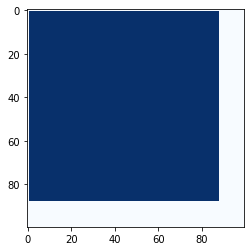

In [110]:
cell_new=spread(cell,size)
times=1
while cell_new[1,1]<1:
    cell_new=spread(cell_new,size)
    plot_ca(cell_new)
    times+=1
print(times)

In [150]:
# 加上一点概率
def spread_pro(cell,size):
    cell_new=cell.copy()# 创建一个新矩阵，不在原矩阵上进行运算
    for row in range(1,size-1):#[1,99)左开右闭
        for col in range(1,size-1):
            rumor_number=sum(cell[row-1,col-1:col+2])+sum(cell[row,col-1:col+2])+sum(cell[row+1,col-1:col+2])
            if rumor_number>0:
                if cell[row,col]==1:# 已经是传谣者
                    cell_new[row,col]=1
                else:#如果不是传谣者则有50%的概率听从谣言
                    seed=np.random.rand(1)
                    if bool(seed>0.5):
                        cell_new[row,col]=1
                
    return cell_new

In [128]:
size=10 #100*100narray，其实是98*98的有效范围，相当于做一个padding方便卷积
cell=np.zeros((size,size))
cell[int(size/2),int(size/2)]=1

cell_new=spread_pro(cell,size)

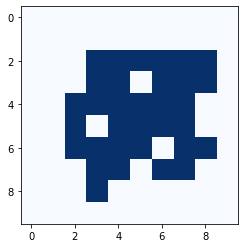

In [131]:
cell_new=spread_pro(cell_new,size)
plot_ca(cell_new)

In [151]:
def spread_SetPro(cell,size,probility):# 可以设置概率的spraed
    cell_new=cell.copy()# 创建一个新矩阵，不在原矩阵上进行运算
    for row in range(1,size-1):#[1,99)左开右闭
        for col in range(1,size-1):
            rumor_number=sum(cell[row-1,col-1:col+2])+sum(cell[row,col-1:col+2])+sum(cell[row+1,col-1:col+2])
            if rumor_number>0:
                if cell[row,col]==1:# 已经是传谣者
                    cell_new[row,col]=1
                else:#如果不是传谣者则有50%的概率听从谣言
                    seed=np.random.rand(1)
                    if bool(seed<probility):
                        cell_new[row,col]=1
                
    return cell_new

In [162]:
size=100
cell=np.zeros((size,size))
cell[int(size/2),int(size/2)]=1
rumor_count_0_5=[0]

cell_new=spread_SetPro(cell,size,0.5)
rumor_count_0_5.append(np.sum(cell_new))

for i in range(20):
    cell_new=spread_SetPro(cell_new,size,0.5)
    rumor_count_0_5.append(np.sum(cell_new))

In [167]:
size=100
cell=np.zeros((size,size))
cell[int(size/2),int(size/2)]=1
rumor_count_0_2=[0]

cell_new=spread_SetPro(cell,size,0.01)
rumor_count_0_2.append(np.sum(cell_new))

for i in range(20):
    cell_new=spread_SetPro(cell_new,size,0.01)
    rumor_count_0_2.append(np.sum(cell_new))

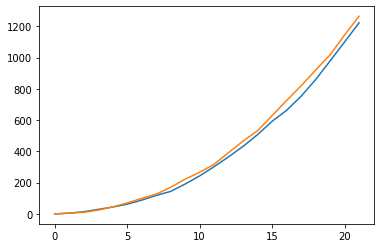

In [168]:
plt.plot(np.arange(22),rumor_count_0_5)
plt.plot(np.arange(22),rumor_count_0_2)